## GRIP Task 6

### Create the decision tree classifier and visualize it graphically

#### Author - Shivani K
#### Batch - August 2024

### Importing necessary libraries

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import classification_report

### Loading the dataset

In [36]:
iris = load_iris()
X=iris.data[:,:] 
y=iris.target

In [37]:
df=pd.DataFrame(iris['data'],columns=['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])
df['Species']=iris['target']
df['Species']=df['Species'].apply(lambda x: iris['target_names'][x])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Exploratory Data Analysis

#### Basic EDA

In [38]:
df.shape

(150, 5)

In [39]:
df.size

750

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The dataframe has 4 numerical columns and 1 categorical column.

In [41]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Checking for duplicate rows and dropping them

In [42]:
df.duplicated().sum()

1

In [43]:
df.drop_duplicates(inplace=True)

In [44]:
df.duplicated().sum()

0

#### Checking for presence of null values

In [45]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

#### Univariate Analysis

In [46]:
cat = df.select_dtypes(include='object').columns.to_list()
num = df.select_dtypes(include=np.number).columns.to_list()

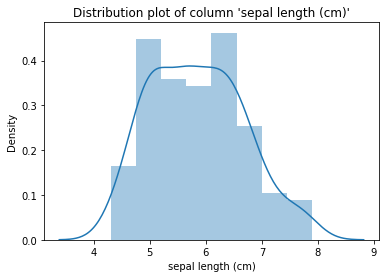

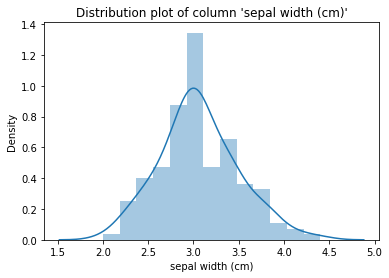

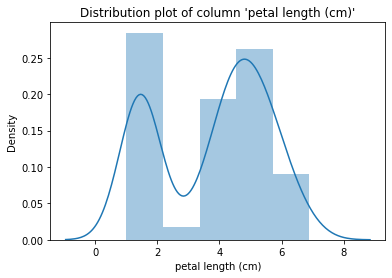

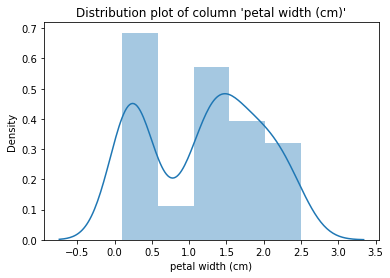

In [47]:
for i in num:
    sns.distplot(df[i])
    plt.title(f"Distribution plot of column '{i}'")
    plt.show()

In [48]:
for i in num:
    print(f'The skew value of column "{i}" is {df[i].skew()}')

The skew value of column "sepal length (cm)" is 0.31282618518725164
The skew value of column "sepal width (cm)" is 0.30714862900770284
The skew value of column "petal length (cm)" is -0.2631010864738464
The skew value of column "petal width (cm)" is -0.09007614642546066


'sepal length (cm)', 'sepal width (cm)' columns are very slightly positively skewed, while 'petal length (cm)', 'petal width (cm)' columns are very slightly negatively skewed.

In [49]:
for i in num:
    print(f'The kurtosis value of column "{i}" is {df[i].kurt()}')

The kurtosis value of column "sepal length (cm)" is -0.5690064194325988
The kurtosis value of column "sepal width (cm)" is 0.22623593929839858
The kurtosis value of column "petal length (cm)" is -1.4082697588005129
The kurtosis value of column "petal width (cm)" is -1.339953002941382


All the columns are platykurtic in nature.

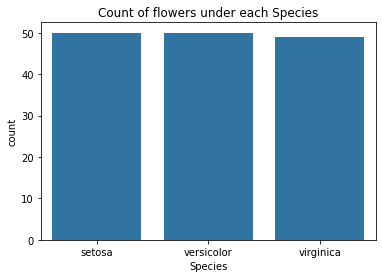

In [50]:
for i in cat:
    sns.countplot(x=df[i])
    plt.title('Count of flowers under each Species')
    plt.show()

In [51]:
df['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

#### Bivariate Analysis

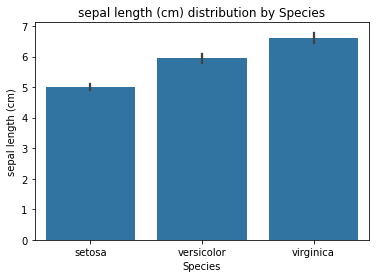

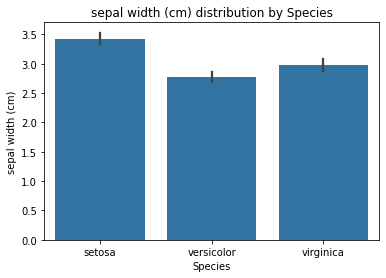

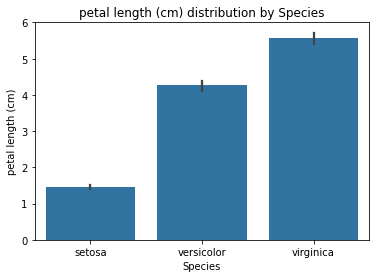

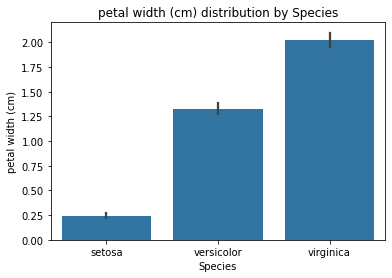

In [52]:
for i in num:
    sns.barplot(x=df['Species'],y=df[i])
    plt.title(f'{i} distribution by Species')
    plt.show()

In [53]:
for i in num:
    print(df.groupby('Species')[i].mean())
    print()
    print('-------------------------------')


Species
setosa        5.006000
versicolor    5.936000
virginica     6.604082
Name: sepal length (cm), dtype: float64

-------------------------------
Species
setosa        3.428000
versicolor    2.770000
virginica     2.979592
Name: sepal width (cm), dtype: float64

-------------------------------
Species
setosa        1.462000
versicolor    4.260000
virginica     5.561224
Name: petal length (cm), dtype: float64

-------------------------------
Species
setosa        0.246000
versicolor    1.326000
virginica     2.028571
Name: petal width (cm), dtype: float64

-------------------------------


#### Multivariate Analysis

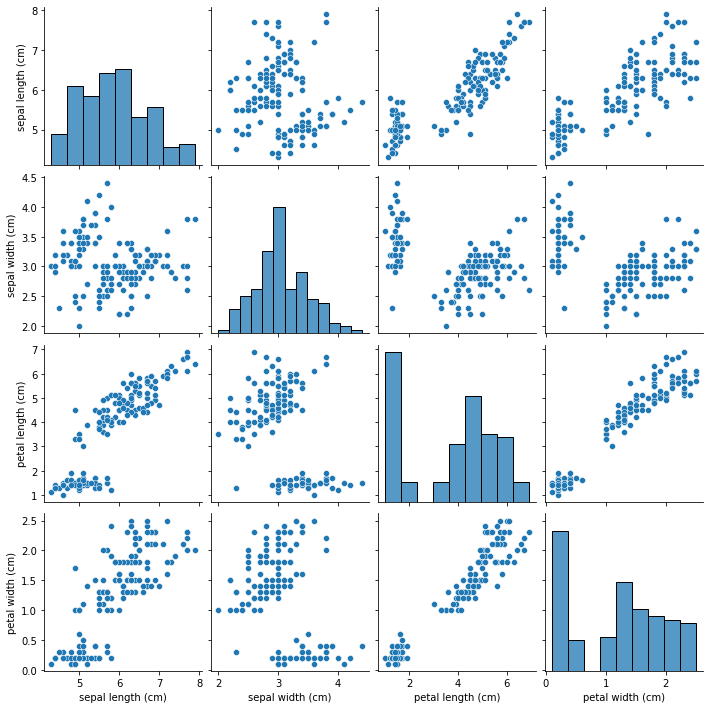

In [54]:
sns.pairplot(df)
plt.show()

There is a very strong positive correlation between columns 'petal length (cm)' and 'petal width (cm)'.

### Data Preprocessing for model building

#### Encoding the target variable

In [55]:
df['Species'] = df['Species'].replace({'setosa':0, 'versicolor':1, 'virginica':2})

### Model Building

#### Train-test split

In [56]:
x = df.drop(columns='Species')
y = df['Species']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,random_state=2)

#### Training the model

In [57]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

#### Visualizing the tree graphically

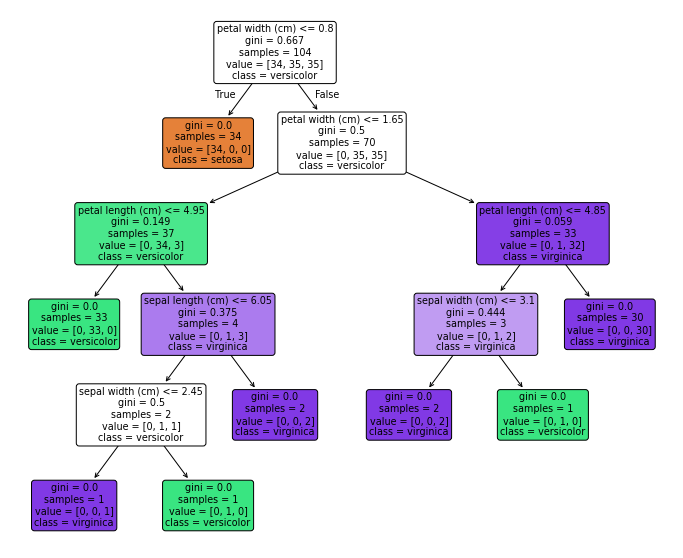

In [58]:
plt.figure(figsize=(12,10))
plot_tree(dt,feature_names=iris.feature_names[:],
        class_names=iris.target_names, filled=True, rounded=True)
plt.show()

### Model Evaluation

In [59]:
ypred = dt.predict(xtest)

In [60]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.93      0.97        15
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



The model exhibits outstanding performance with a weighted F1-score of 0.98, demonstrating its ability to accurately predict across all classes.